<a href="https://colab.research.google.com/github/5rangeclick/DL/blob/DAcrew/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C_EDA_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train = pd.read_csv('/content/drive/MyDrive/raw data/open/train.csv')
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,-12079,-1984,1,0,0,0,Core staff,4.0,-2.0,1.0
26453,26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,-15291,-2475,1,0,0,0,NaN,2.0,-47.0,2.0
26454,26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,-10082,-2015,1,0,0,0,Core staff,2.0,-25.0,2.0
26455,26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,-10145,-107,1,0,0,0,Laborers,1.0,-59.0,2.0


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/raw data/open/test.csv')
test

# 컬럼별 정보

In [ ]:
train.keys()

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

- index

- gender: 성별

- car: 차량 소유 여부

- reality: 부동산 소유 여부

- child_num: 자녀 수

- income_total: 연간 소득

- income_type: 소득 분류
['Commercial associate', 'Working', 'State servant(공무원)', 'Pensioner(연금수령자)', 'Student']

- edu_type: 교육 수준
['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

- family_type: 결혼 여부
['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

- house_type: 생활 방식

-  DAYS_BIRTH: 출생일 / 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일 / 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미 / 양수 값은 고용되지 않은 상태를 의미함

- FLAG_MOBIL: 핸드폰 소유 여부

- work_phone: 업무용 전화 소유 여부

- phone

- begin_month: 신용카드 발급 월

- email: 이메일 소유 여부

- occyp_type: 직업 유형

- family_size: 가족 규모

- begin_month: 신용카드 발급 월 (데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미)

- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 (0, 1, 2) (낮을 수록 높은 신용의 신용카드 사용자를 의미함)

In [ ]:
# Dtype 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [ ]:
train.describe() #수치형 변수들만을 기준으로 카운트, 평균, 표준편차, 최소/최댓값, 4분위 수를 기준으로 25%, 50%, 75%에 해당하는 값들을 테이블로 출력

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [ ]:
train.nunique()
#FLAG_MOBIL은 값의 종류가 한 개뿐

index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
occyp_type          18
family_size         10
begin_month         61
credit               3
dtype: int64

# 결측치 확인

<Axes: >

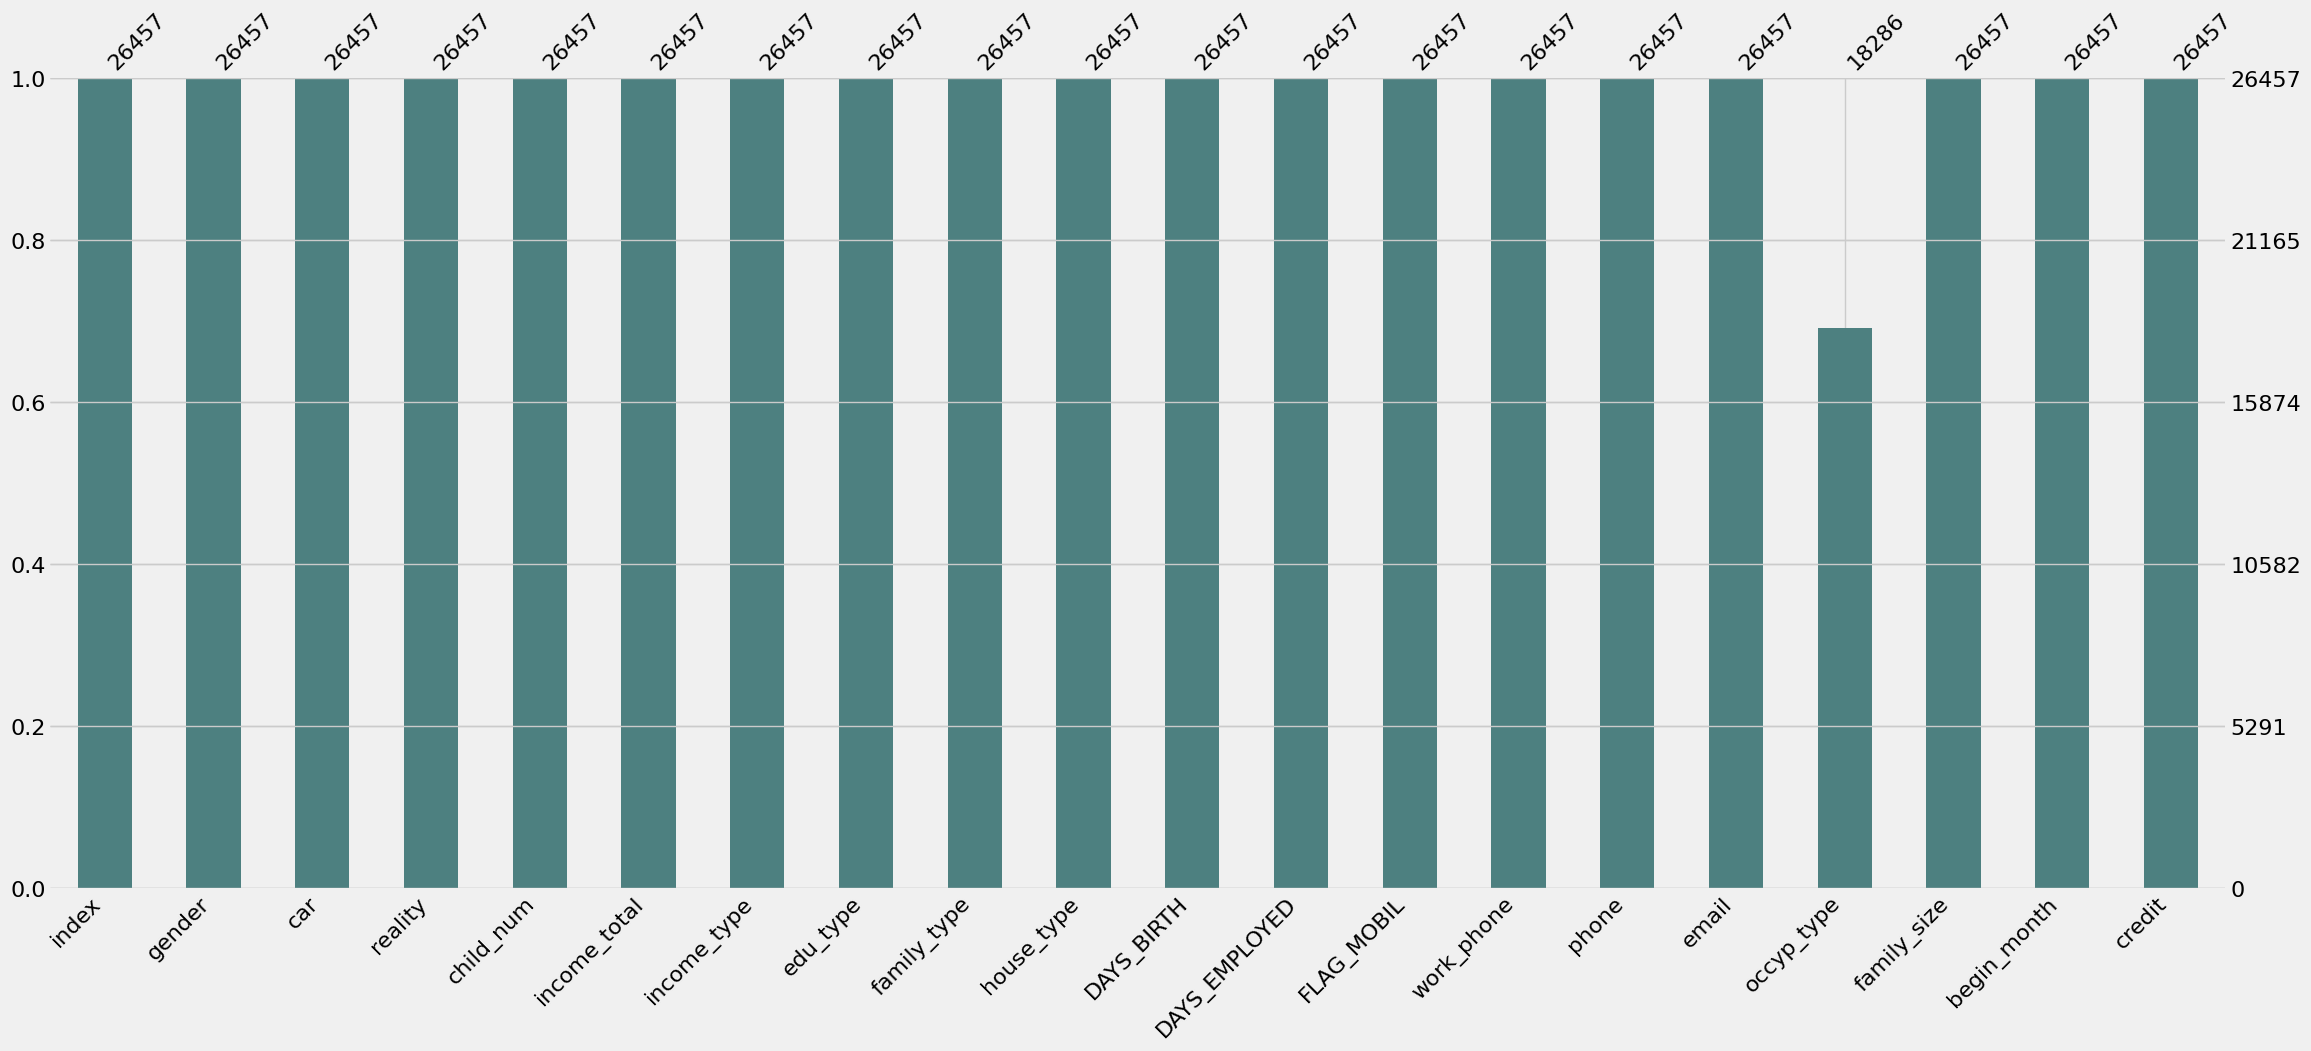

In [ ]:
import missingno as msno
msno.bar(df=train.iloc[:], color=(0.3, 0.5, 0.5))

#occyp_type에만 결측치

In [ ]:
#credit과 다른 컬럼들의 상관계수 확인(object형 제외)
credit_corr = train.corr()['credit']
credit_corr

#begin_month가 압도적으로 높다

index           -0.007841
child_num        0.004081
income_total     0.008555
DAYS_BIRTH      -0.025187
DAYS_EMPLOYED   -0.003798
FLAG_MOBIL            NaN
work_phone      -0.003134
phone            0.003452
email            0.014812
family_size      0.008227
begin_month     -0.147477
credit           1.000000
Name: credit, dtype: float64

#상관계수 확인

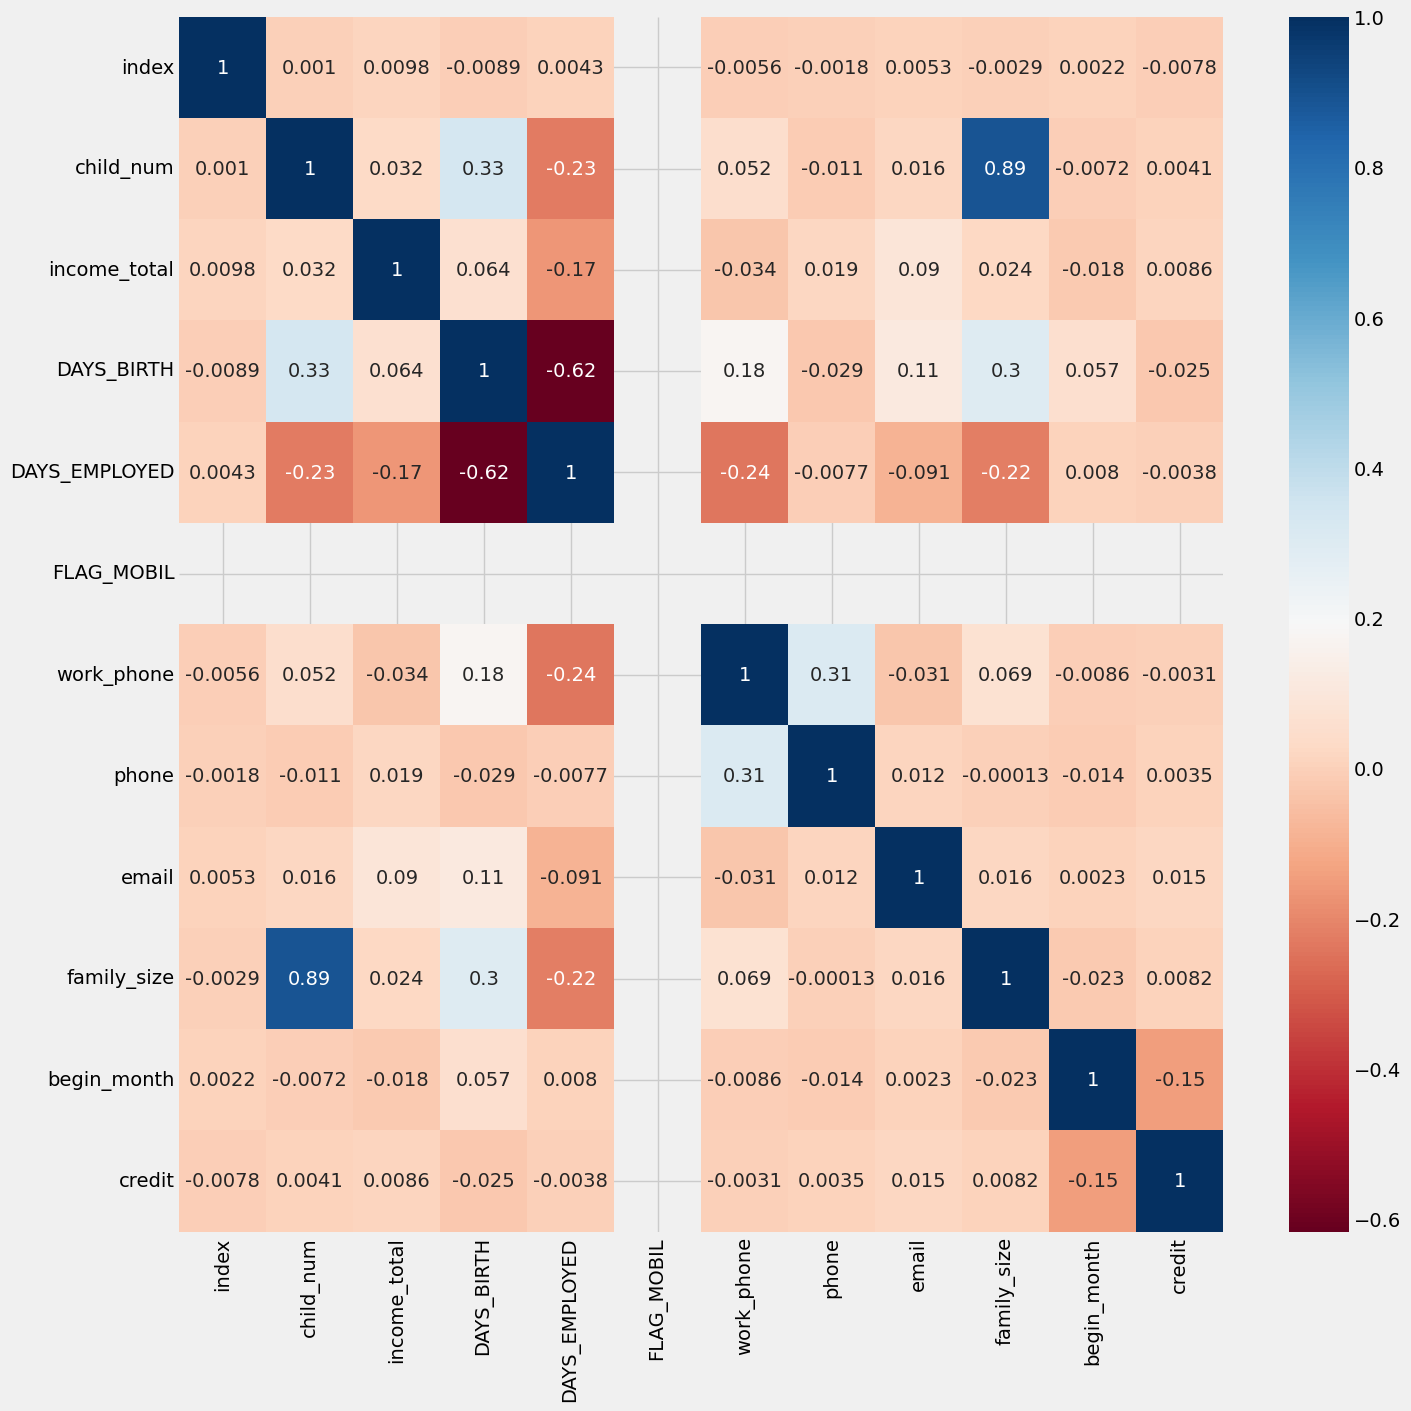

In [ ]:
#object형을 제외한 컬럼들의 상관계수 확인
corr = train.corr()

plt.figure(figsize=(15, 15))
sns.heatmap(corr, cmap ='RdBu', annot= True)
plt.show()
#FRAG_MOBIL은 모두 같은 값이라 비어있고, family_size와 child_num / DAYs_EMPLOYED와 DAYS_BIRTH 등이 상관관계를 보임을 확인

# 일변량(Univariate)

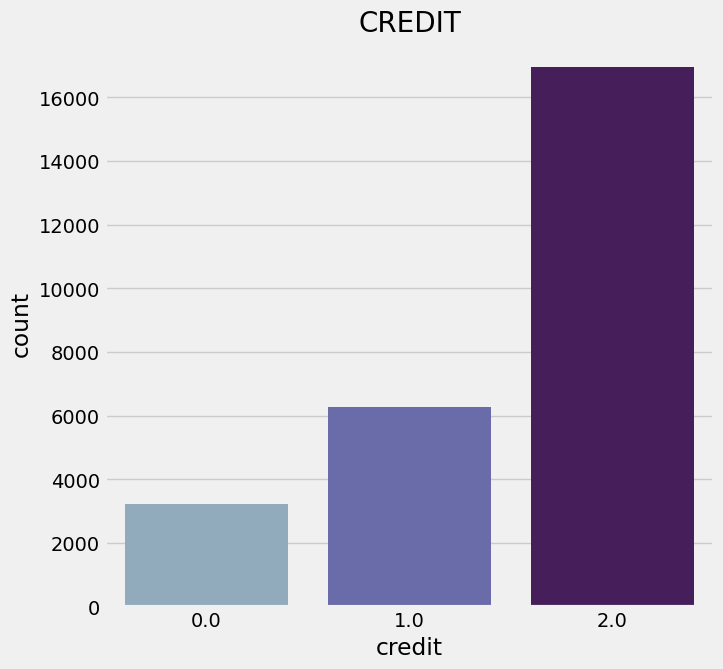

In [ ]:
#y라벨인 credit의 값 분포 확인
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7,7)) #그래프 크기 지정
sns.countplot(x=train['credit'], data=train, ax=ax);
plt.title('CREDIT', fontsize=20); #그래프 타이틀 지정

#신용도가 낮은(2) 사람이 많다

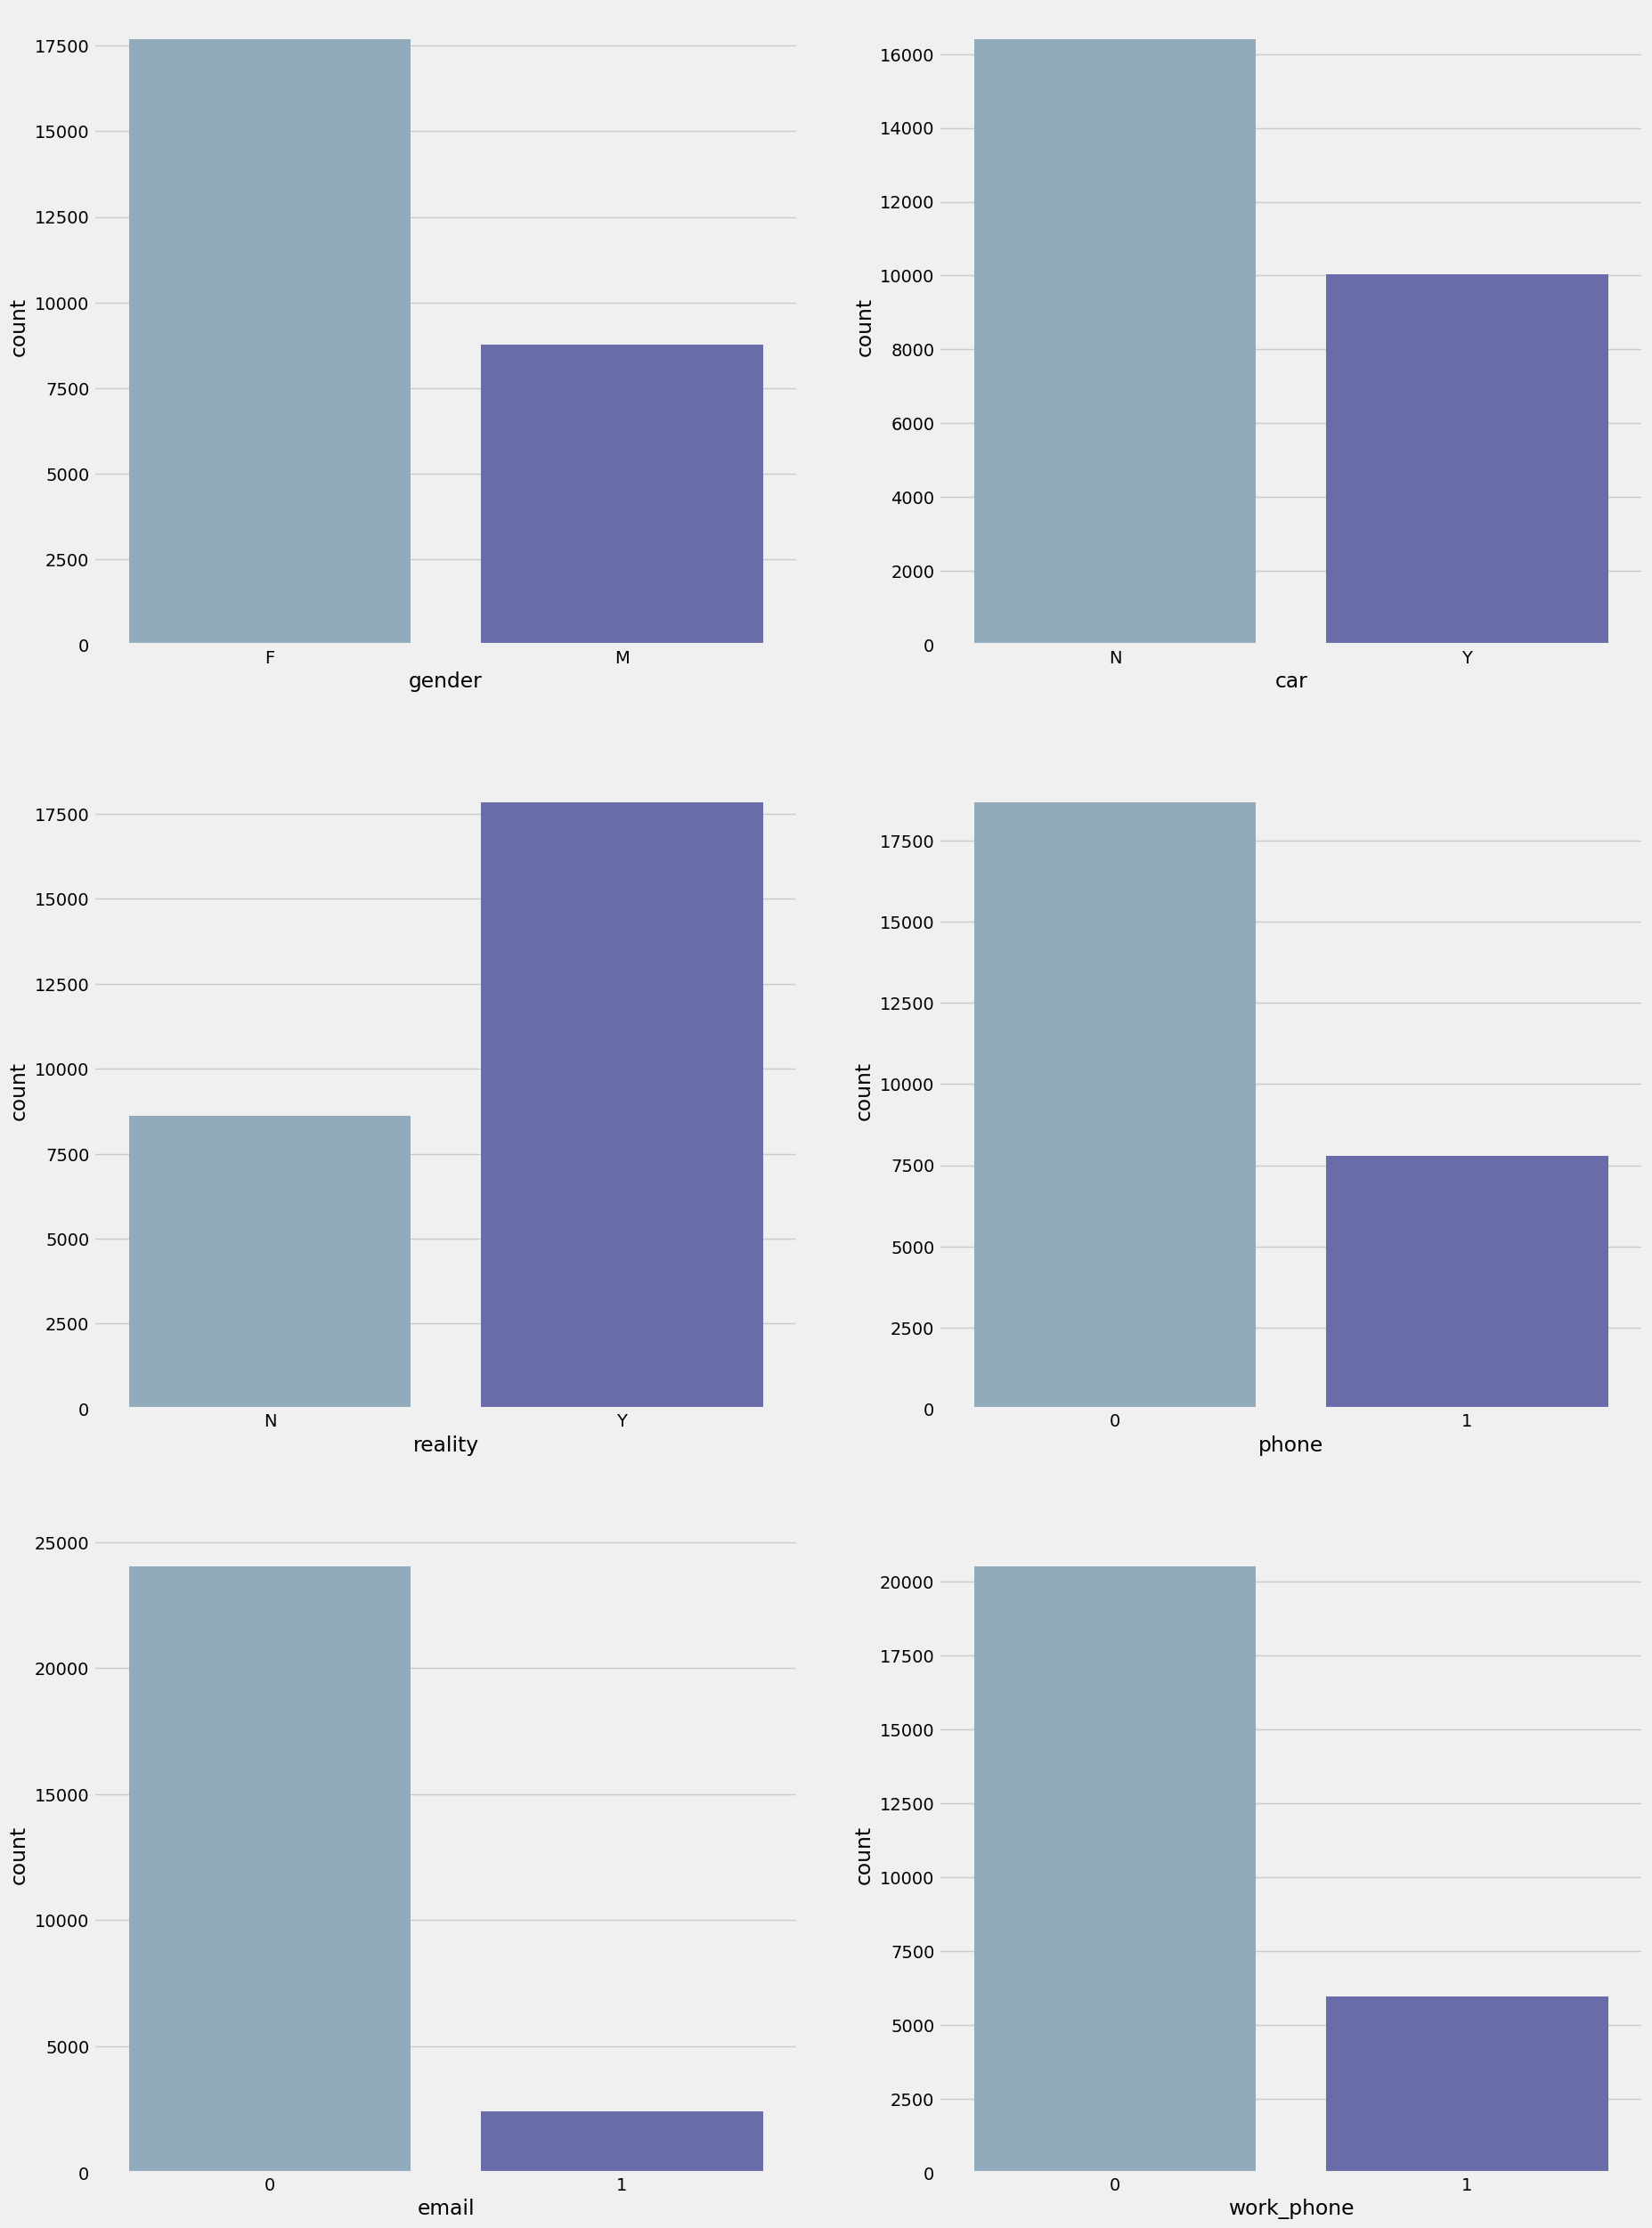

In [ ]:
#값의 종류가 두 개뿐인 컬럼들의 값의 분포를 한번에 확인

graph_cols = ['gender', 'car', 'reality', 'phone', 'email', 'work_phone']

plt.figure(figsize=(20,30))

for i in range(len(graph_cols)):
  plt.subplot(int(len(graph_cols)/2), 2, i+1)
  sns.countplot(x=graph_cols[i], data=train)

#gender은 F, car는 N, reality는 Y, phone/email/work_phone은 모두 0이 더 많았다

# 결혼과 가족관련 컬럼

family_type(결혼 여부), family_size, child_num

In [ ]:
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [ ]:
train['family_type'].value_counts()

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

In [ ]:
train['child_num'].value_counts()
#20인 가족이 진짜 있나보다...

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

family_type: Married vs Civil marriage

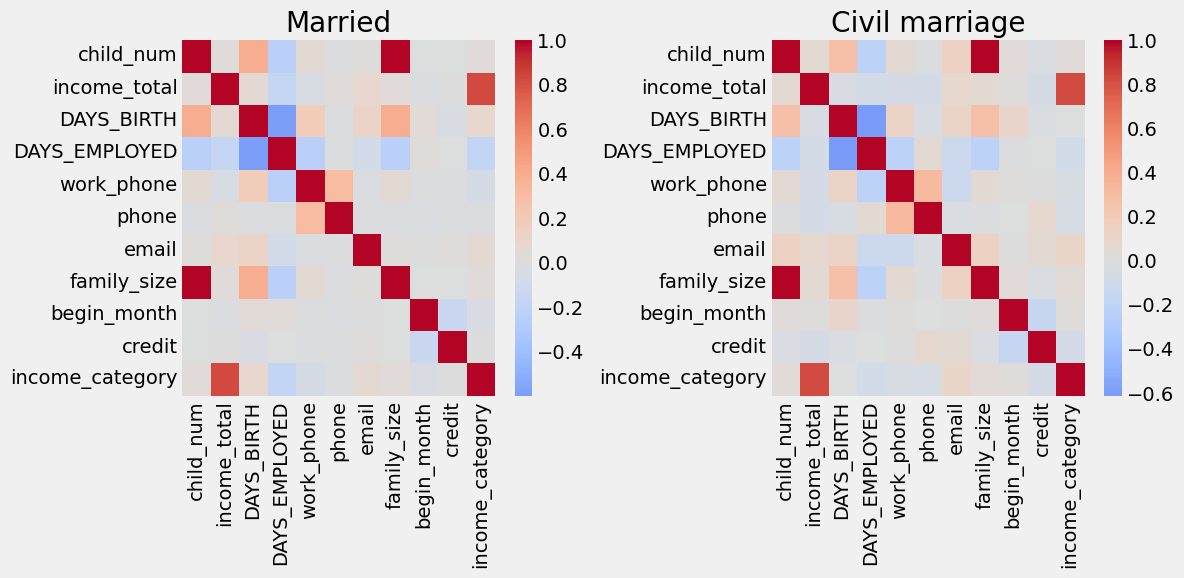

In [ ]:
# 'family_type'이 'Married'인 경우와 'Civil marriage'인 경우의 상관관계 행렬
Married_corr = train[train['family_type'] == 'Married'].corr()
civil_marriage_corr = train[train['family_type'] == 'Civil marriage'].corr()

# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(Married_corr, cmap='coolwarm', center=0)
plt.title("Married")

plt.subplot(1, 2, 2)
sns.heatmap(civil_marriage_corr, cmap='coolwarm', center=0)
plt.title("Civil marriage")

plt.tight_layout()
plt.show()

#xx('Married'인 경우와 'Civil marriage'인 경우 다른 변수들과의 상관관계가 크게 다르지는 않은 느낌. 둘 다 그냥 '결혼'으로 묶어도 될까?)

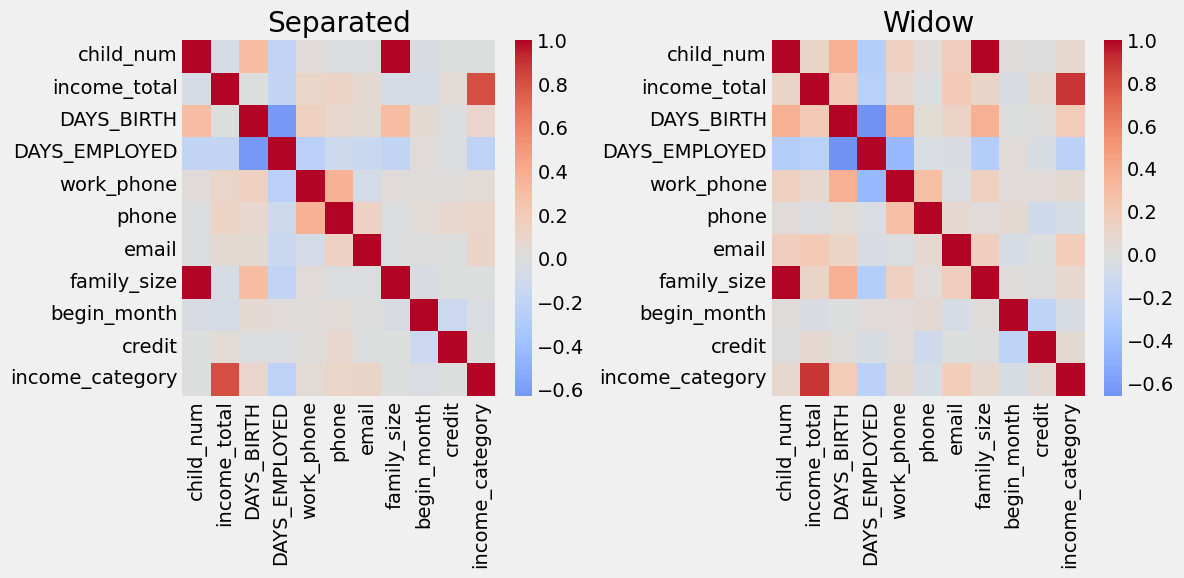

In [ ]:
# 'family_type'이 'Separated'인 경우와 'Widow'인 경우의 상관관계 행렬
Separated_corr = train[train['family_type'] == 'Separated'].corr()
civil_marriage_corr = train[train['family_type'] == 'Widow'].corr()

# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(Separated_corr, cmap='coolwarm', center=0)
plt.title("Separated")

plt.subplot(1, 2, 2)
sns.heatmap(civil_marriage_corr, cmap='coolwarm', center=0)
plt.title("Widow")

plt.tight_layout()
plt.show()

#'Separated'와 'Widow'도 비슷하지 않을까?

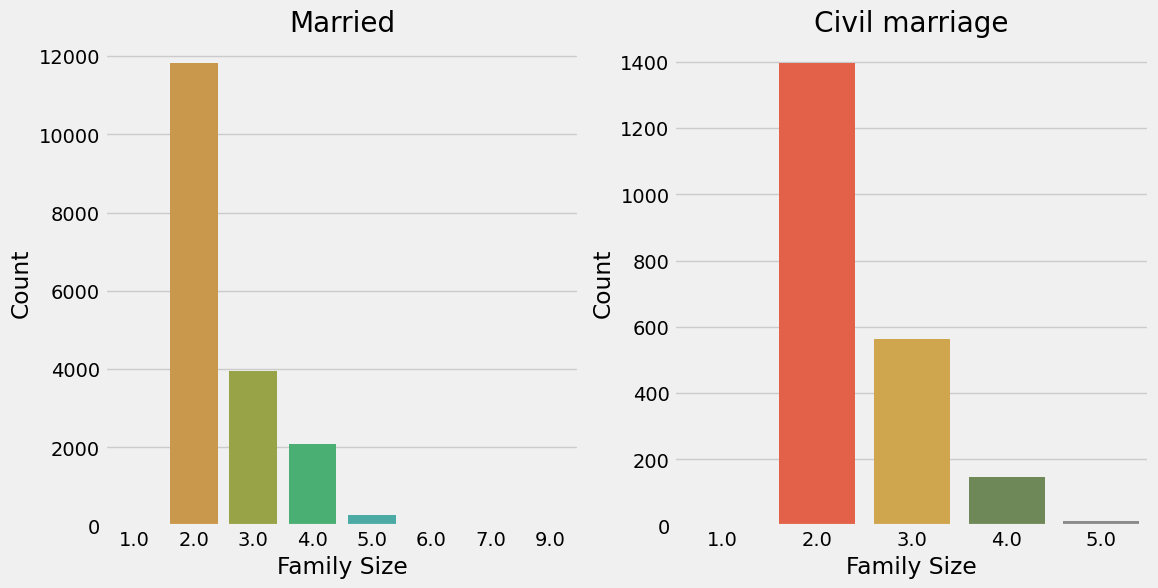

In [ ]:
# 'family_type'이 'Married'인 사람들의 'family_size'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='family_size', data=train[train['family_type'] == 'Married'])
plt.title("Married")
plt.xlabel("Family Size")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
# 'family_type'이 'Civil marriage'인 사람들의 'family_size'
sns.countplot(x='family_size', data=train[train['family_type'] == 'Civil marriage'])
plt.title("Civil marriage")
plt.xlabel("Family Size")
plt.ylabel("Count")

plt.show()

In [ ]:
train.loc[train['family_type'] == 'Married', 'family_size'].value_counts()

2.0    11828
3.0     3947
4.0     2091
5.0      273
6.0       43
7.0        9
1.0        3
9.0        2
Name: family_size, dtype: int64

In [ ]:
train.loc[train['family_type'] == 'Civil marriage', 'family_size'].value_counts()

2.0    1397
3.0     563
4.0     148
5.0      14
1.0       1
Name: family_size, dtype: int64

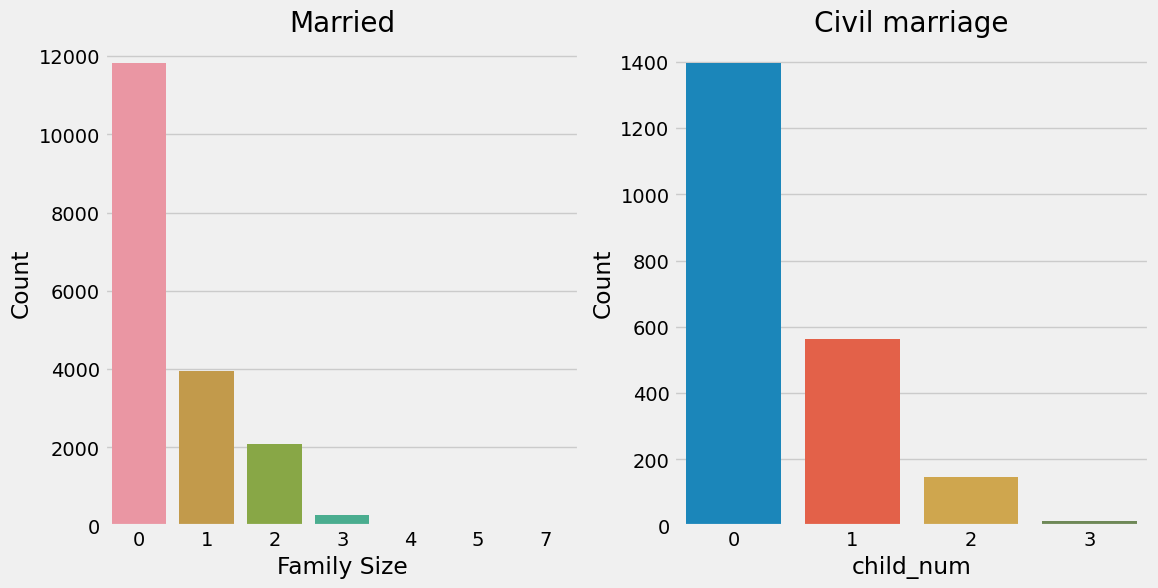

In [ ]:
# 'family_type'이 'Married'인 사람들의 'child_num'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='child_num', data=train[train['family_type'] == 'Married'])
plt.title("Married")
plt.xlabel("Family Size")
plt.ylabel("Count")

plt.subplot(1, 2, 2)

# 'family_type'이 'Civil marriage'인 사람들의 'child_num'
sns.countplot(x='child_num', data=train[train['family_type'] == 'Civil marriage'])
plt.title("Civil marriage")
plt.xlabel("child_num")
plt.ylabel("Count")

plt.show()

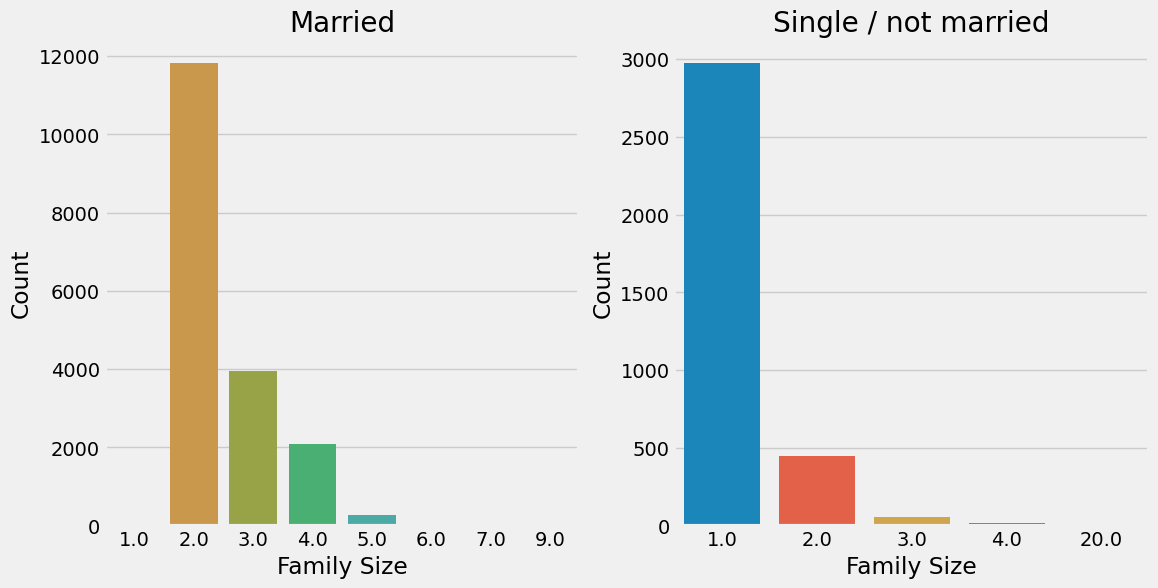

In [ ]:
# 'family_type'이 'Single / not married'인 사람들의 'family_size'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.countplot(x='family_size', data=train[train['family_type'] == 'Single / not married'])
plt.title("Single / not married")
plt.xlabel("Family Size")
plt.ylabel("Count")

# 'family_type'이 'Married'인 사람들의 'family_size'
plt.subplot(1, 2, 1)
sns.countplot(x='family_size', data=train[train['family_type'] == 'Married'])
plt.title("Married")
plt.xlabel("Family Size")
plt.ylabel("Count")

plt.show()

In [ ]:
#family_size는 1인가구 ~ 20인가구까지 있지만 1인가구 ~ 4인이상 가구로 5종류로만 나누는 건 어떨까?
# => 그럴 경우 1인 5000 / 2인 14000 / 3인 4500 / 4인이상 2500
train['family_size'].value_counts()

2.0     14106
1.0      5109
3.0      4632
4.0      2260
5.0       291
6.0        44
7.0         9
15.0        3
9.0         2
20.0        1
Name: family_size, dtype: int64

In [ ]:
#child_num도 1명 ~ 4명 이상으로 나누기
train['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

In [ ]:
#single, widow, separated를 single 하나로 통일하는 건 어떨까
train['family_type'].value_counts()

# Married (Married, Civil marriage) / Single (single, widow, separated) 로만 나누기

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

# 결측치 컬럼(occyp_type) 및 관련 컬럼 탐색

## occyp_type

In [ ]:
#열에 어떤 값들이 있는지 확인
train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [ ]:
#값들이 몇 번씩 등장하는지 확인
occyp_counts = train['occyp_type'].value_counts()
occyp_counts

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

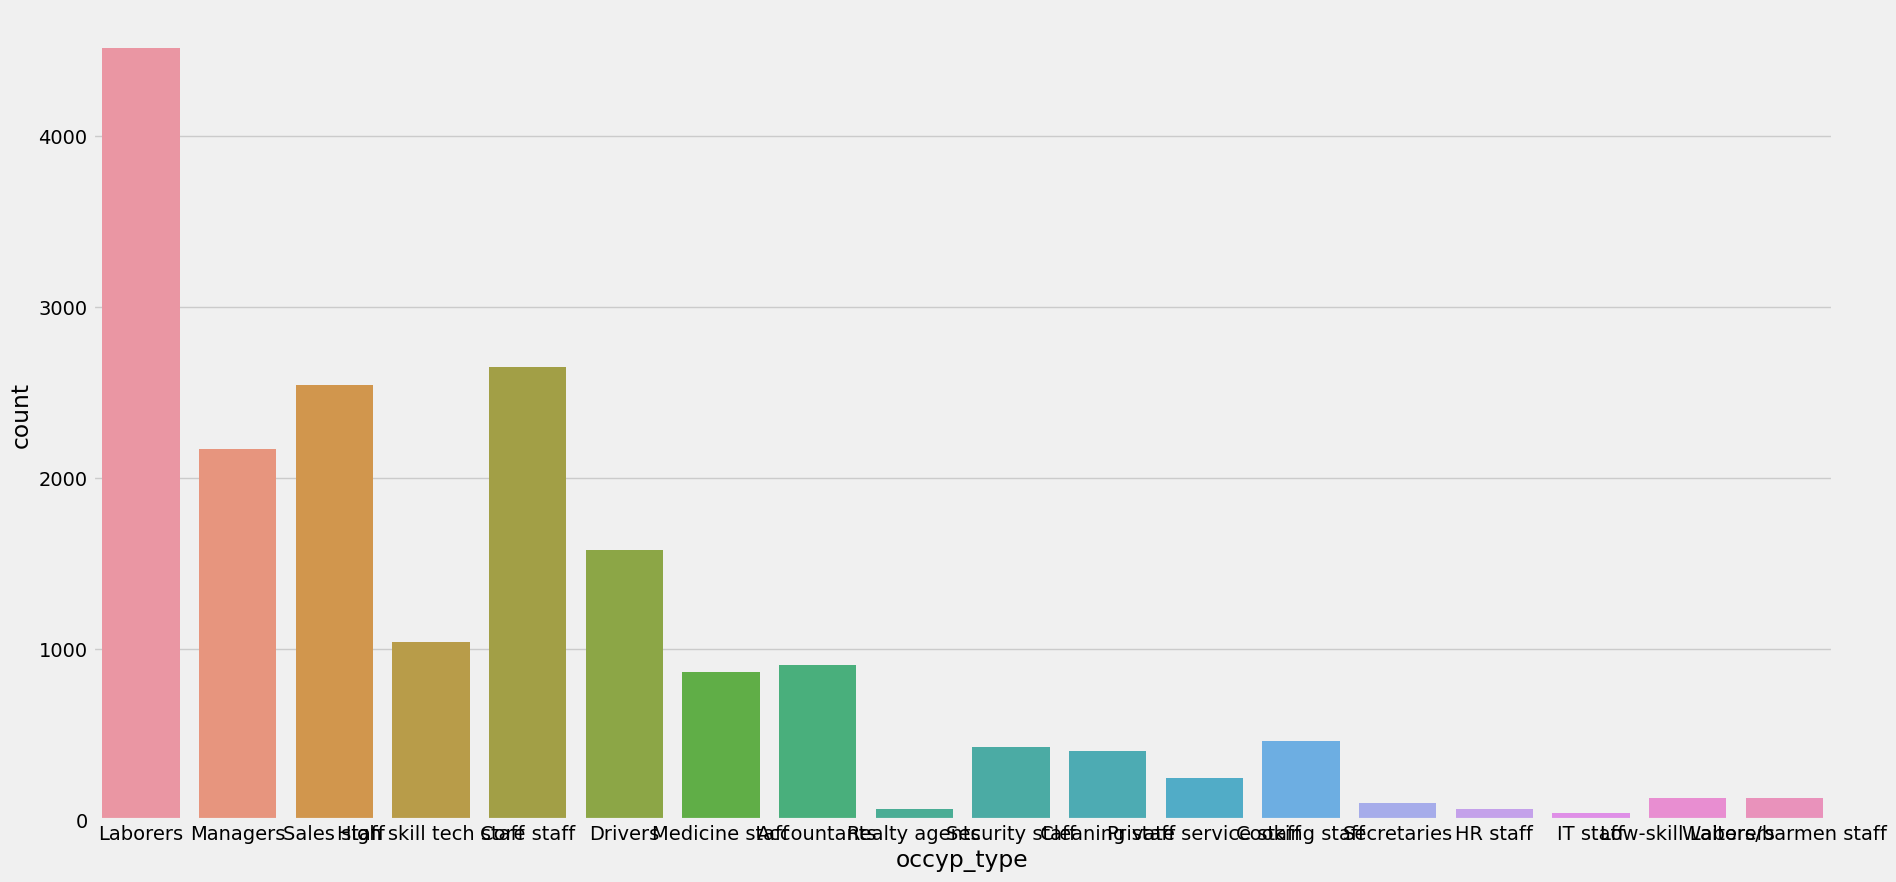

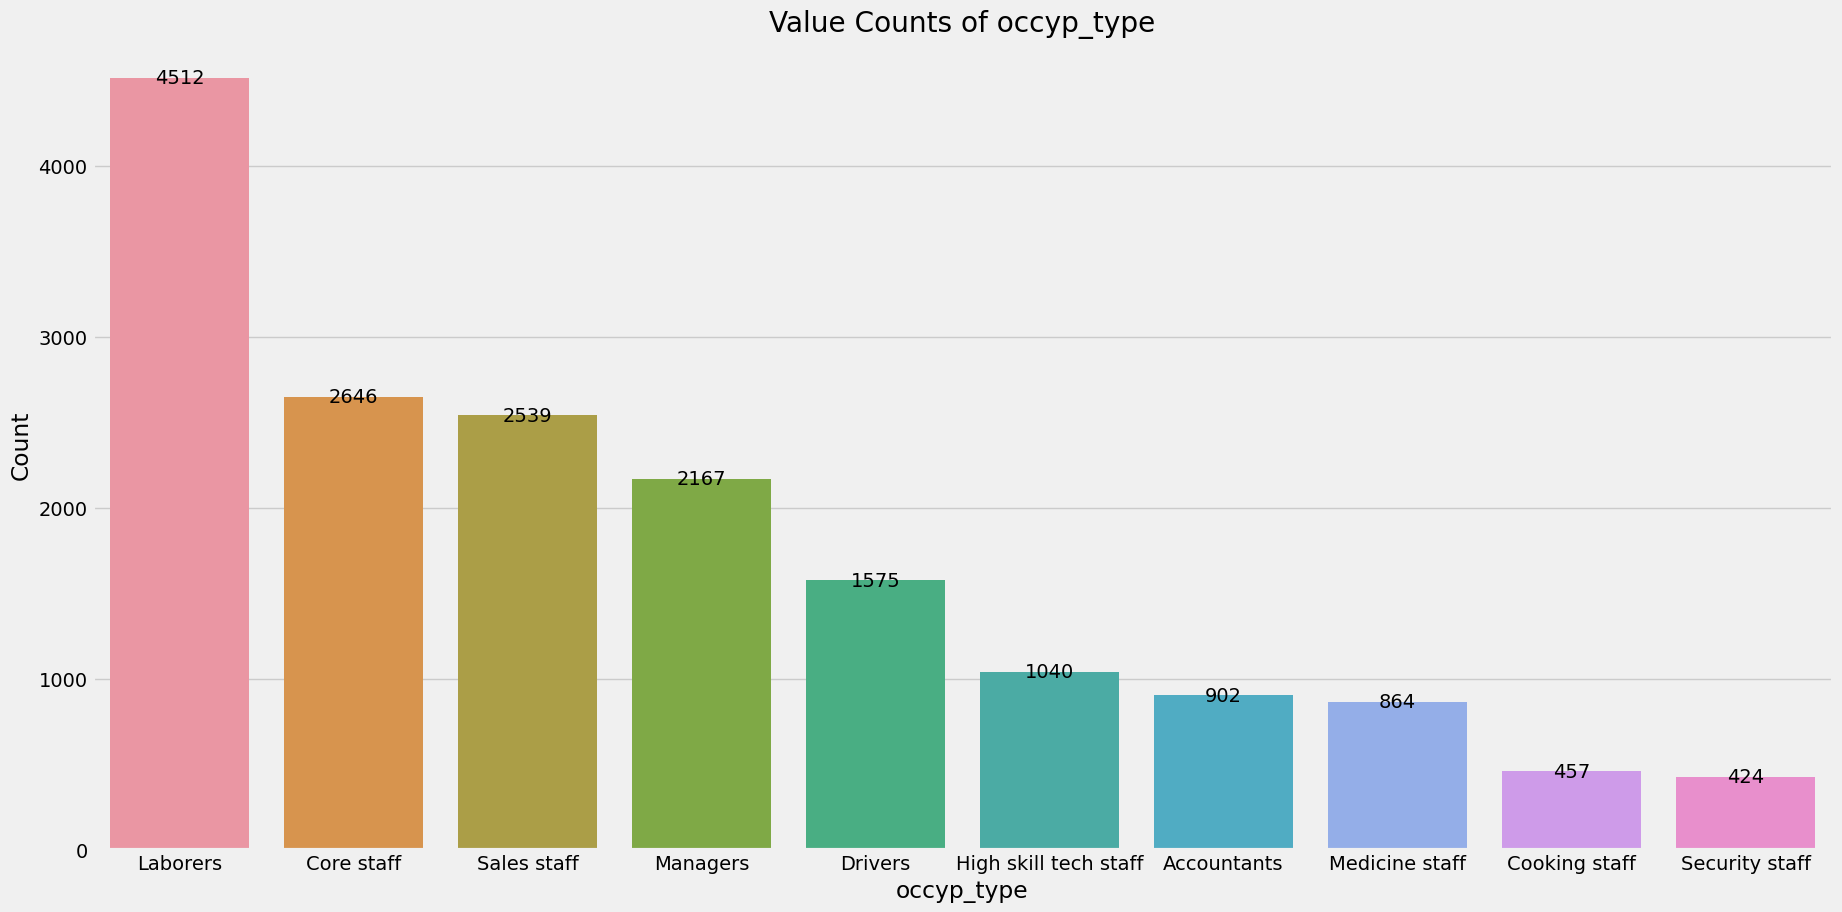

In [ ]:
#모든 occyp_type의 분포 확인
plt.figure(figsize=(20, 10))
sns.countplot(x='occyp_type', data=train)

##################################################
#한눈에 보기 위해상위 10개 값만 분포를 확인

top_10_values = occyp_counts[:10]

plt.figure(figsize=(20, 10))

# 그래프에 값의 빈도수를 표시
for index, value in enumerate(top_10_values):
    plt.text(index, value, str(value), ha='center', va='center')
    # index와 value 값을 활용하여 각 막대 위에 빈도수를 텍스트로 표시,  ha='center', va='bottom': 가로로는 센터, 세로로는 아래

# Seaborn의 막대 그래프를 사용하여 상위 10개 값의 비율을 시각화합니다.
sns.countplot(x='occyp_type', data=train, order=top_10_values.index)

# 그래프의 제목과 축 레이블을 설정
plt.title('Value Counts of occyp_type')
plt.xlabel('occyp_type')
plt.ylabel('Count')

plt.show()

#Laborers가 압도적으로 많고, Core staff, Sales staff, Managers가 2000여명으로 그 뒤를 이음

## income_total

In [ ]:
#소득별로 직업 분포를 보기 위해 income_total을 비슷한 개수로 (고르게) 다섯 구간으로 나눔.

def bin_income_total(income):
    bins = pd.qcut(income, q=5, labels=False)
    return bins

# 'income_total' 열을 5개의 구간으로 나눈 결과를 'income_category' 열에 추가
train['income_category'] = bin_income_total(train['income_total'])

# 결과 출력
print(train)

      gender car reality  child_num  income_total           income_type  \
0          F   N       N          0      202500.0  Commercial associate   
1          F   N       Y          1      247500.0  Commercial associate   
2          M   Y       Y          0      450000.0               Working   
3          F   N       Y          0      202500.0  Commercial associate   
4          F   Y       Y          0      157500.0         State servant   
...      ...  ..     ...        ...           ...                   ...   
26452      F   N       N          2      225000.0         State servant   
26453      F   N       Y          1      180000.0               Working   
26454      F   Y       N          0      292500.0               Working   
26455      M   N       Y          0      171000.0               Working   
26456      F   N       N          0       81000.0               Working   

                            edu_type           family_type  \
0                   Higher education 

In [ ]:
train['income_category'].value_counts()
#다섯 구간으로 적절히 나눠서 들어감. income_total이 가장 적은 0구간의 사람들이 가장 많았음.

0    6191
3    5389
2    5294
4    4856
1    4727
Name: income_category, dtype: int64

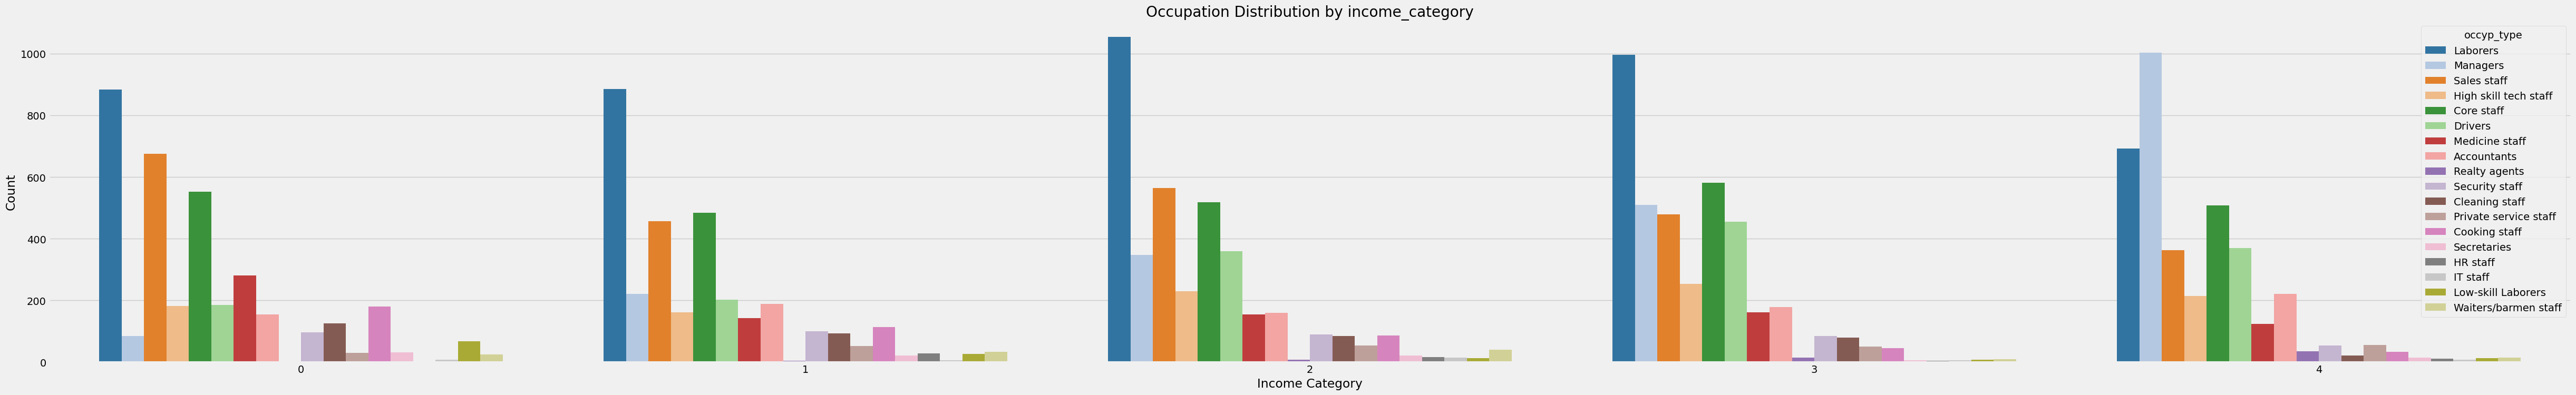

In [ ]:
# 'income_category'별 직업군(occyp_type) 분포 시각화
plt.figure(figsize=(55, 8))
sns.countplot(x='income_category', hue='occyp_type', data=train, palette='tab20')

# 그래프의 제목과 축 레이블을 설정
plt.title('Occupation Distribution by income_category')
plt.xlabel('Income Category')
plt.ylabel('Count')

plt.legend(title='occyp_type', loc='upper right')

plt.show()

#Laborers의 수는 원래 절대적으로 많았는데, 가장 고소득자인 구간인 4구간의 그래프를 보면 managers가 Laborers보다도 많은 것을 확인할 수 있다.
#occyp_type이 managers인 사람들의 소득이 굉장히 높음을 알 수 있다.

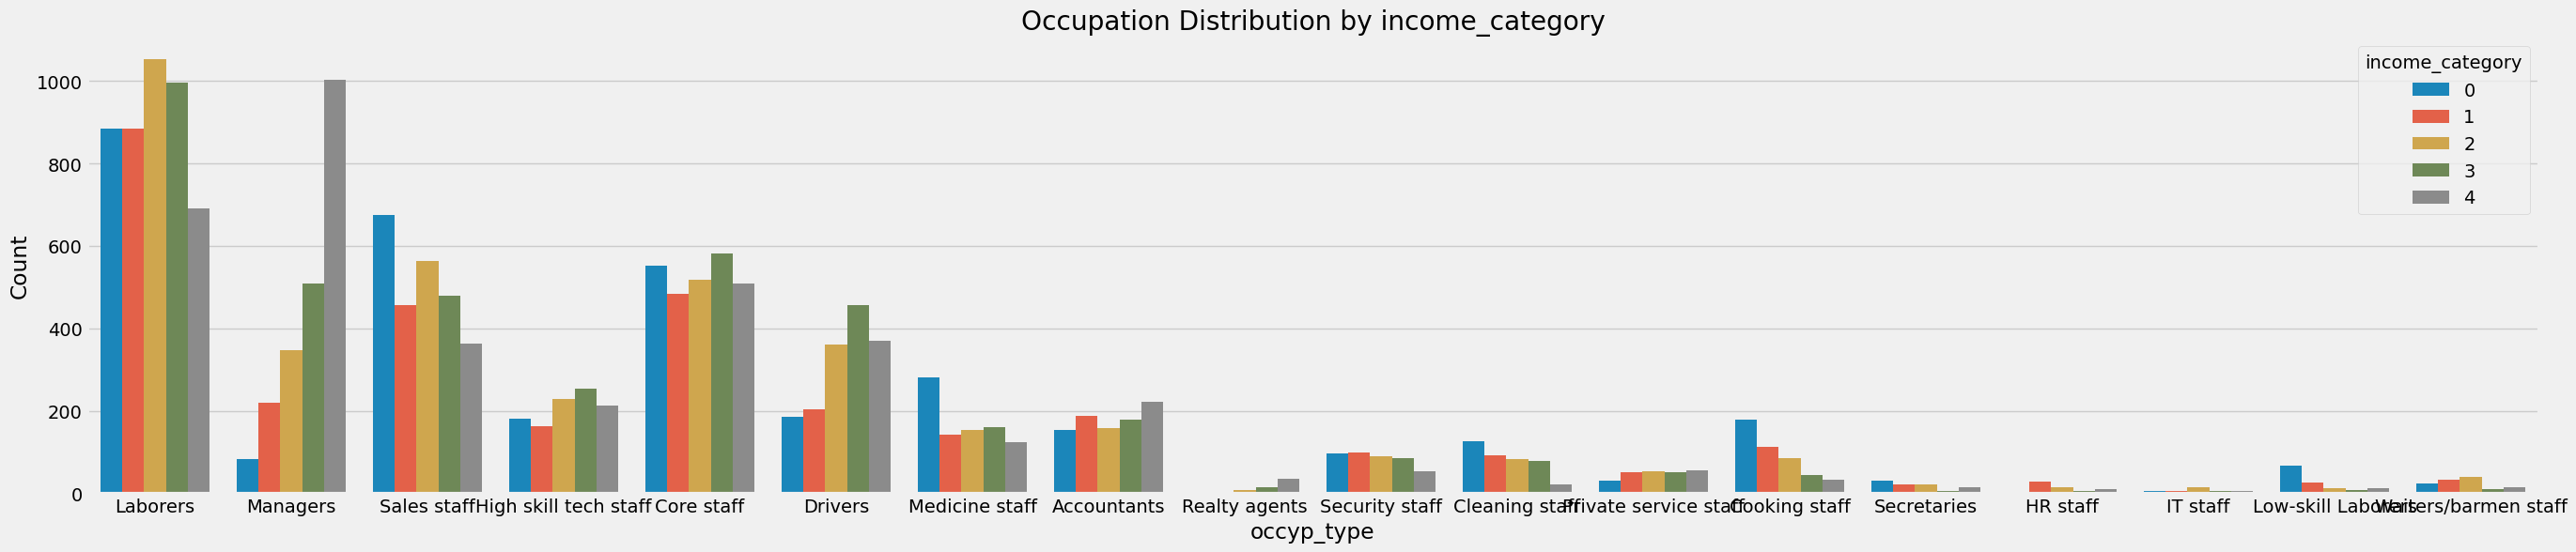

In [ ]:
# 직업군(occyp_type)별 'income_category' 분포 시각화
plt.figure(figsize=(30, 6))
sns.countplot(x='occyp_type', hue='income_category', data=train)

# 그래프의 제목과 축 레이블을 설정
plt.title('Occupation Distribution by income_category')
plt.xlabel('occyp_type')
plt.ylabel('Count')

plt.legend(title='income_category', loc='upper right')

plt.show()

#역시 Managers는 주로 소득이 높은 구간에 있으며, cleaning staff, cooking staff, Low-skill Laborers은 주로 소득이 낮은 구간에 있다.

## income_type

occyp_type과의 차이가 모호하게 느껴지는 income_type 컬럼 탐색

In [ ]:
train['income_type'].value_counts()
#Working이 가장 많으며, student의 수가 단 7명으로 절대적으로 적다.

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

**Commercial associate와 Working**

- Commercial associate (상업 파트너):

기업과의 파트너십이나 계약 등으로 소득을 얻는 사람, 기업과의 계약 또는 협력을 통해 수익을 창출하는 ***`자영업자, 사업가, 자문 컨설턴트`*** 등이 있을 것으로 추측


- Working (근로자):

직원, 노동자, 근로자(정규직, 비정규직, 계약직 등으로 일하는 사람들)를 포함할 것으로 추측.


'Commercial associate'는 상업적인 관계를 맺고 수익을 얻는 경제 활동을 하는 직업군, 'Working'은 단순히 일자리에서 근로하는 직업군일 것으로 판단.

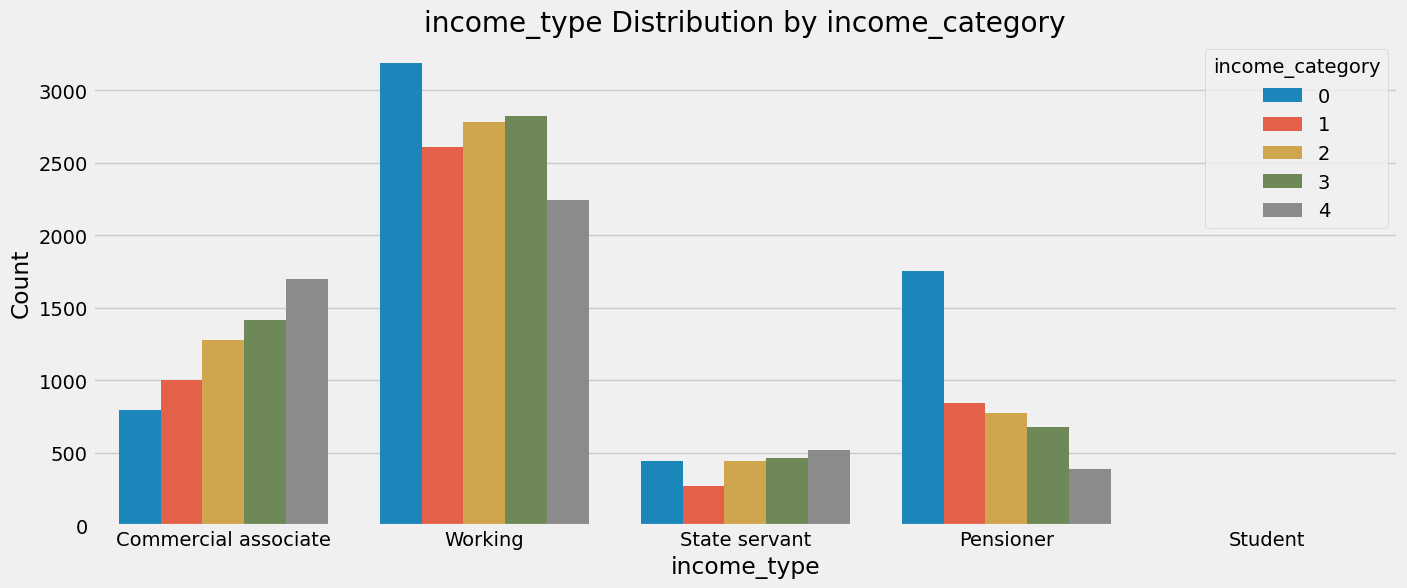

In [ ]:
#아까 나눠둔 income_category 다섯 구간으로 income_type도 확인

# income_type(Working, Commercial associate, State servant, Student)별 'income_category' 분포 시각화
plt.figure(figsize=(15, 6))
sns.countplot(x='income_type', hue='income_category', data=train)

# 그래프의 제목과 축 레이블을 설정
plt.title('income_type Distribution by income_category')
plt.xlabel('income_type')
plt.ylabel('Count')

plt.legend(title='income_category', loc='upper right')

plt.show()

#연금수령자는 연간 소득이 적은 구간에 몰려 있음을 확인.
#Commercial associate는 소득이 높은 구간일수록 더 수가 많음. =>Commercial associate 중에 고소득자가 많을 것으로 추측

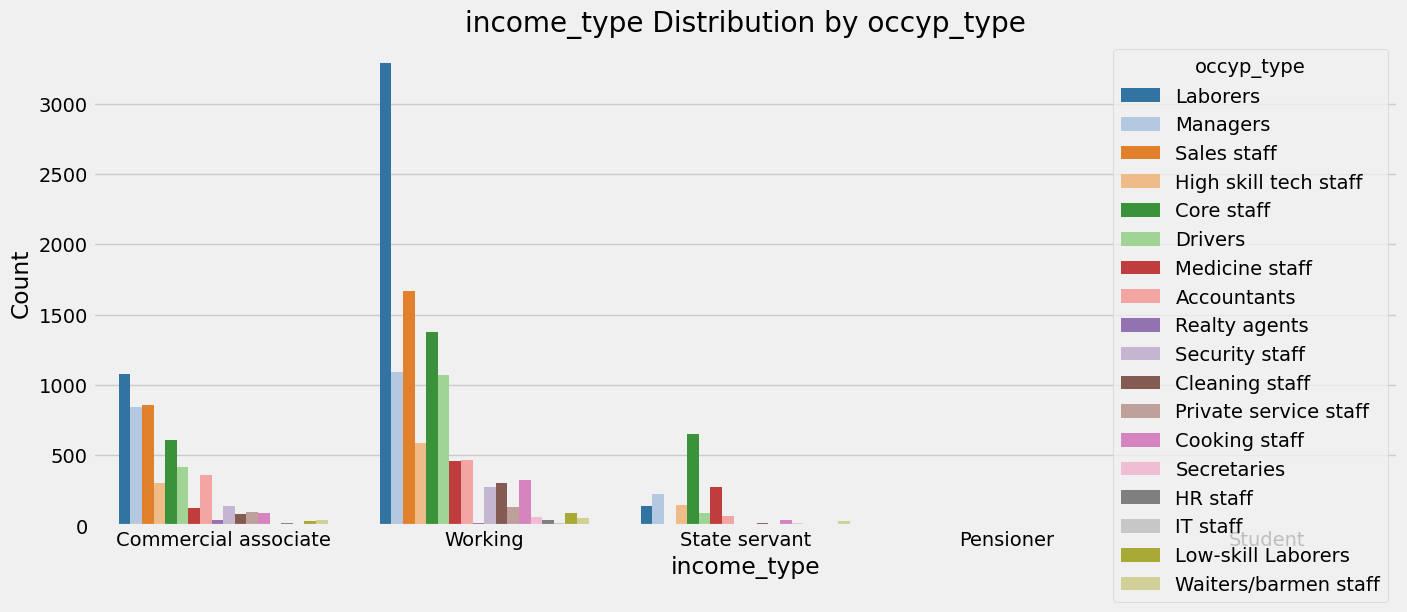

In [ ]:
# income_type별 'occyp_type' 분포 시각화
plt.figure(figsize=(15, 6))
sns.countplot(x='income_type', hue='occyp_type', data=train, palette='tab20')

# 그래프의 제목과 축 레이블을 설정
plt.title('income_type Distribution by occyp_type')
plt.xlabel('income_type')
plt.ylabel('Count')

plt.legend(title='occyp_type', loc='upper right')

plt.show()

#공무원(State servant)은 대부분 core staff로 되어있음.
#commercial associate도 occyp가 다양함을 확인하여, 위에서 추측한 대로 계속 commercial associate를 사업자/자영업자로 보는 게 맞을지 의문.

In [ ]:
#Pensioner(연금수령자)인 사람들만 확인

Pensioner_df = train.loc[train['income_type'] == 'Pensioner']
Pensioner_df

#Pensioner는 occyp_type이 NaN인 것으로 보인다.
#Pensioner는 DAYS_EMPLOYED도 365243인 것으로 보인다. 365243: 무직

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit,income_category
14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,0,1,0,NaN,1.0,-41.0,2.0,2
18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,0,0,0,NaN,2.0,-37.0,2.0,3
21,F,N,N,0,157500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21253,365243,0,1,0,NaN,2.0,-7.0,2.0,2
24,F,N,N,0,202500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22361,365243,0,1,0,NaN,1.0,-5.0,2.0,3
46,F,N,N,0,135000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21100,365243,0,1,0,NaN,1.0,-24.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26431,F,N,Y,0,225000.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-21151,365243,0,0,1,NaN,1.0,-60.0,1.0,3
26432,F,Y,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-22314,365243,0,1,0,NaN,2.0,-17.0,1.0,0
26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,0,0,0,NaN,2.0,-57.0,2.0,0
26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,0,0,0,NaN,1.0,-43.0,2.0,0


In [ ]:
Pensioner_df['DAYS_EMPLOYED'].value_counts()
#연금수령자 4449명 중 현재 고용상태에 있는사람은 11명. 모두 무직은 아니지만 거의 무직인 것으로 봐도 될 듯.

 365243    4438
-1325         1
-2208         1
-2745         1
-586          1
-198          1
-443          1
-3680         1
-673          1
-672          1
-620          1
-5521         1
Name: DAYS_EMPLOYED, dtype: int64

In [ ]:
train['DAYS_EMPLOYED'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 26457 entries, 0 to 26456
Series name: DAYS_EMPLOYED
Non-Null Count  Dtype
--------------  -----
26457 non-null  int64
dtypes: int64(1)
memory usage: 206.8 KB


In [ ]:
#Pensioner 중 occyp_type이 있는 사람의 직업
Pensioner_df['occyp_type'].value_counts()

Laborers          3
Core staff        2
Medicine staff    1
Drivers           1
Accountants       1
Managers          1
Name: occyp_type, dtype: int64

결측치를 조금 채운 채로 EDA 진행

In [18]:
train['DAYS_EMPLOYED'].value_counts()
#고용일수가 양수인 사람이 4438명(무직)

 365243    4438
-401         57
-1539        47
-200         45
-2087        44
           ... 
-10475        1
-2202         1
-2552         1
-680          1
-4973         1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

In [17]:
#일단 DAYS_EMPLOYED가 양수면 무직으로 결측치 처리
train.loc[train['DAYS_EMPLOYED'] > 0, 'occyp_type'] = 'inoccupation'

In [19]:
train['occyp_type'].isna().value_counts()
#NaN값 8171개에서 3733으로 줄었음.

False    22724
True      3733
Name: occyp_type, dtype: int64

In [20]:
#work_phone이 있는 사람은 inoccupation이 아니므로 occyp_type를 unk로 결측치 채우기
train.loc[train['work_phone'] == 1, 'occyp_type'] = 'unk'

In [21]:
train[train['occyp_type'].isna()]
#Nan값 3733개에서 2765개로 줄었음

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0
20,20,M,N,N,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-19850,-1753,1,0,1,0,NaN,2.0,-35.0,2.0
27,27,M,Y,Y,0,405000.0,State servant,Secondary / secondary special,Married,House / apartment,-17309,-3500,1,0,0,0,NaN,2.0,-57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26430,26430,F,N,Y,0,112500.0,Working,Incomplete higher,Civil marriage,House / apartment,-9301,-1751,1,0,0,0,NaN,2.0,-19.0,2.0
26433,26433,F,Y,N,0,121500.0,State servant,Higher education,Married,House / apartment,-19912,-4973,1,0,1,0,NaN,2.0,-31.0,2.0
26435,26435,F,N,N,1,126000.0,Working,Secondary / secondary special,Widow,House / apartment,-19691,-473,1,0,0,0,NaN,2.0,-40.0,2.0
26437,26437,M,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13015,-3647,1,0,0,0,NaN,2.0,-13.0,2.0


## 다시 income_total

In [8]:
max_income = train['income_total'].max()
min_income = train['income_total'].min()

print("최댓값:", max_income)
print("최솟값:", min_income)

최댓값: 1575000.0
최솟값: 27000.0


In [ ]:
#income_total: 최솟값 27000 최댓값 1575000
#달러라면 1575000=20억, 27000=3000만원

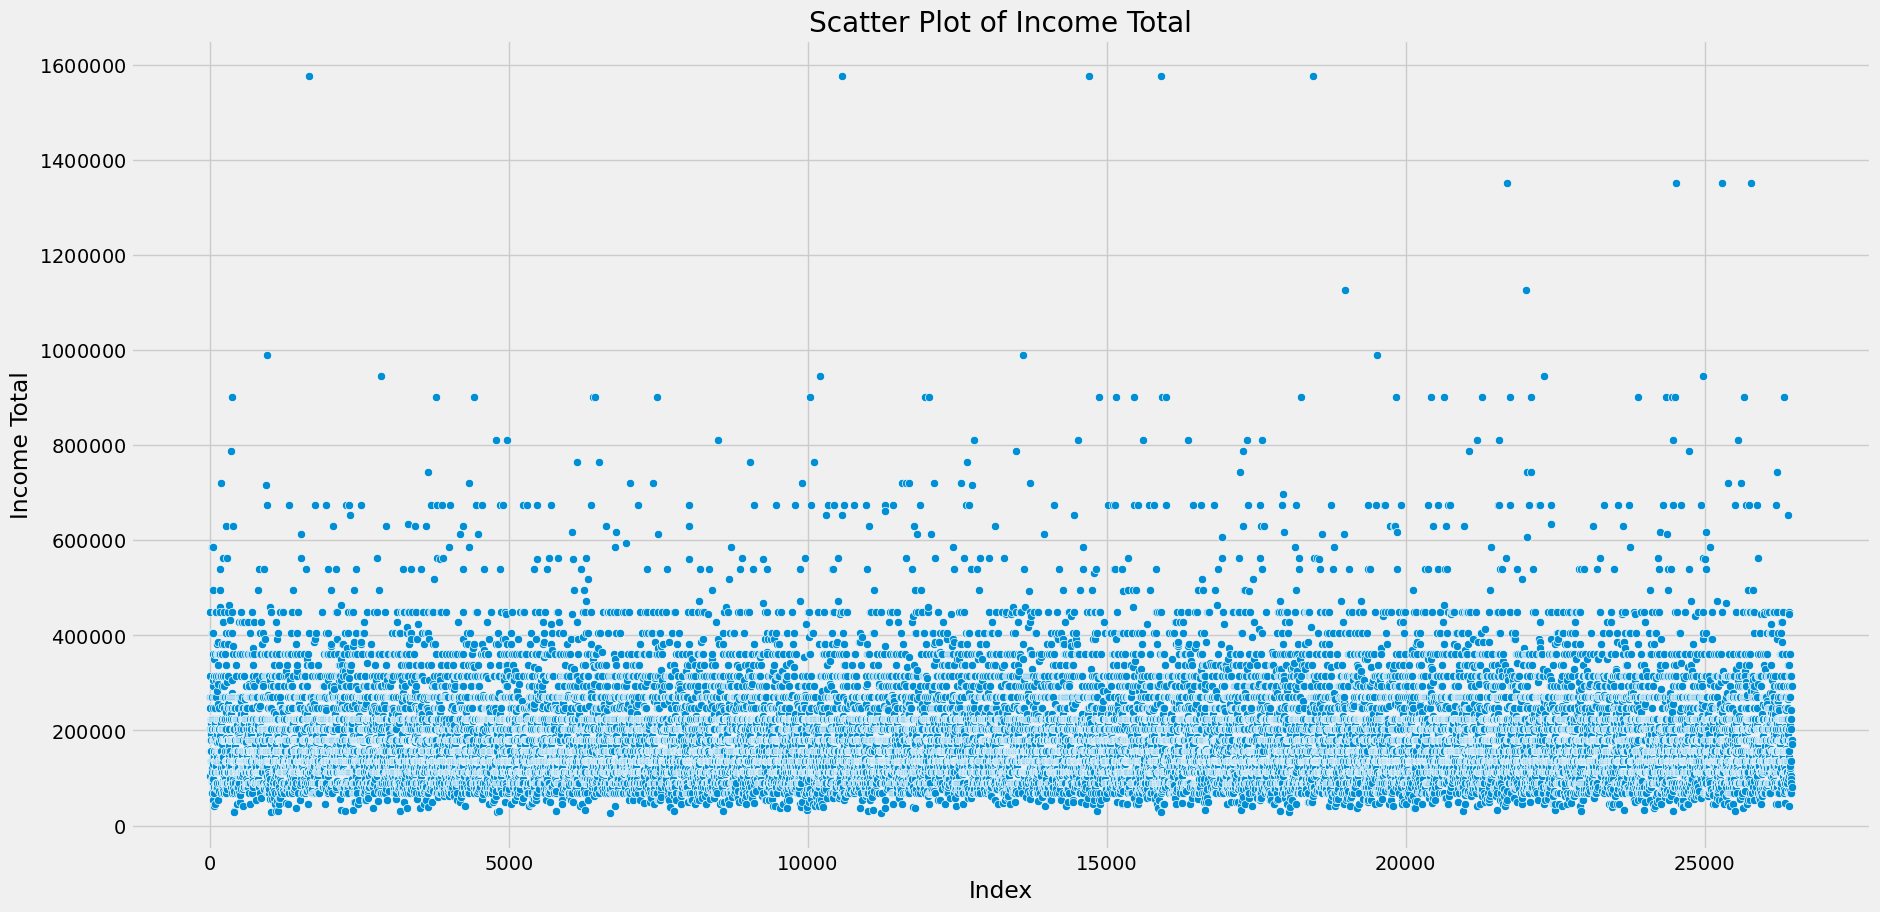

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# 'income_total'을 점으로 나타내는 scatterplot 그리기
plt.figure(figsize=(20, 10))
sns.scatterplot(data=train, x=train.index, y='income_total')
plt.xlabel('Index')
plt.ylabel('Income Total')
plt.title('Scatter Plot of Income Total')

# y축 눈금을 숫자로 표시하도록 설정
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().ticklabel_format(style='plain', useOffset=False)

plt.show()

In [11]:
train['income_total'].describe()

count    2.645700e+04
mean     1.873065e+05
std      1.018784e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income_total, dtype: float64

In [12]:
mean_income = 1.873065e+05
print("평균값:", mean_income)
#평균 연간소득은 187306.5

평균값: 187306.5


In [22]:
# 'income_total'의 하위 5퍼센트에 해당하는 값을 구하기 = 76500.0
lower_5_percentile = train['income_total'].quantile(0.05)
print(lower_5_percentile)

# 하위 5퍼센트에 해당하는 값들만 출력(1264 rows => 총 1264명)
lower_5_percentile_rows = train[train['income_total'] < lower_5_percentile]
print(lower_5_percentile_rows)

76500.0
       index gender car reality  child_num  income_total  \
43        43      F   N       N          0       67500.0   
52        52      F   N       Y          0       54000.0   
64        64      M   Y       N          0       67500.0   
65        65      F   N       Y          0       40500.0   
74        74      F   N       Y          1       67500.0   
...      ...    ...  ..     ...        ...           ...   
26414  26414      F   N       N          1       40500.0   
26427  26427      F   N       Y          0       67500.0   
26429  26429      F   Y       Y          1       67500.0   
26432  26432      F   Y       Y          0       72000.0   
26439  26439      F   N       Y          0       67500.0   

                income_type                       edu_type  \
43                  Working  Secondary / secondary special   
52                Pensioner  Secondary / secondary special   
64     Commercial associate  Secondary / secondary special   
65                  Wor

In [23]:
lower_5_percentile_rows['occyp_type'].value_counts()
#하위 5퍼센트의 직업은 다수가 무직이었음!
#그다음 많은 하위 5퍼센트의 직업: work_phone은 있지만 직업을 알 수 없는 unk.

inoccupation             507
unk                      356
Laborers                  92
Sales staff               65
Core staff                51
Cooking staff             35
Medicine staff            27
Cleaning staff            19
High skill tech staff     10
Security staff             9
Managers                   7
Accountants                6
Waiters/barmen staff       4
Secretaries                4
Low-skill Laborers         2
Drivers                    1
Name: occyp_type, dtype: int64

In [24]:
#연간소득 하위 10퍼센트는?
#무직이 727, 직업을 알 순 없지만 있긴 있는 unk가 567.

# income_total의 10% 분위수 값
quantile_10 = train['income_total'].quantile(0.1)

# income_total이 10% 분위수보다 작은 행들의 'occyp_type'의 빈도수
train[train['income_total'] < quantile_10]['occyp_type'].value_counts()

inoccupation             727
unk                      567
Laborers                 137
Sales staff               98
Core staff                84
Cooking staff             52
Medicine staff            40
Cleaning staff            27
High skill tech staff     21
Security staff            13
Managers                  11
Low-skill Laborers        11
Accountants                9
Drivers                    8
Waiters/barmen staff       4
Secretaries                4
Private service staff      3
Name: occyp_type, dtype: int64

In [ ]:
#연간소득 상위 10퍼센트도 확인

# income_total의 90% 분위수 값을 구함
quantile_90 = train['income_total'].quantile(0.9)

# income_total이 90% 분위수보다 큰 행들의 'occyp_type'의 빈도수를 계산
train[train['income_total'] > quantile_90]['occyp_type'].value_counts()

#상위 10퍼센트 중 가장 많은 직업군은 Managers니까 상위 10퍼센트인 unk의 직업도 Managers로 넣어줘도 될까?
#Core staff는 하위 10퍼센트와 상위 10퍼센트 둘 다에서 빈도 수가 상위권이다.
#Core staf 빼고는 다른 스태프들 중 고소득 스태프 / 저소득 스태프로 이분화하는 건 어떨까?

Managers                 412
unk                      411
Core staff               189
inoccupation             132
Laborers                 126
Drivers                  113
Sales staff              112
Accountants               83
High skill tech staff     51
Security staff            29
Medicine staff            25
Private service staff     17
Realty agents              8
Cooking staff              8
Secretaries                4
IT staff                   3
Low-skill Laborers         2
Cleaning staff             2
HR staff                   2
Waiters/barmen staff       1
Name: occyp_type, dtype: int64